In [1]:
import torch
import matplotlib.pyplot as plt
from datagenfordiff.datasetdif import SynthSignalsDataset
import os

In [5]:
num_samples_per_class = 10000 
noise_level = 0.0 
device = 'cpu'  

dataset =SynthSignalsDataset(num_samples_per_class, noise_level, device)

project_folder_path = 'C:/Users/Admin/Desktop/diffusion_ts/s'

# Create the 'datasets' folder inside 'P' if it doesn't exist
datasets_folder_path = os.path.join(project_folder_path, 'datasets')
os.makedirs(datasets_folder_path, exist_ok=True)

torch.save(dataset, os.path.join(datasets_folder_path, 'train_set.pth'))

In [6]:
def normalize_dataset(dataset):


    data_loader = torch.utils.data.DataLoader(dataset, batch_size = len(dataset), shuffle = False)
    data = next(iter(data_loader))['signals']
    mean = torch.mean(data)
    std = torch.std(data)

    dataset.x_data = (dataset.x_data - mean) / std

    return dataset

In [17]:
def test_dataset(dataset, title="Dataset Sample"):
    plt.figure(figsize=(10, 6))
    
    plt.plot(dataset[2]['signals'], label=f'Sample {4}')
    plt.title(title)
    plt.legend()
    plt.show()

   
    sample_signals = dataset[0]['signals']
    print(f"Sample Mean: {sample_signals.mean()}, Sample Std: {sample_signals.std()}")


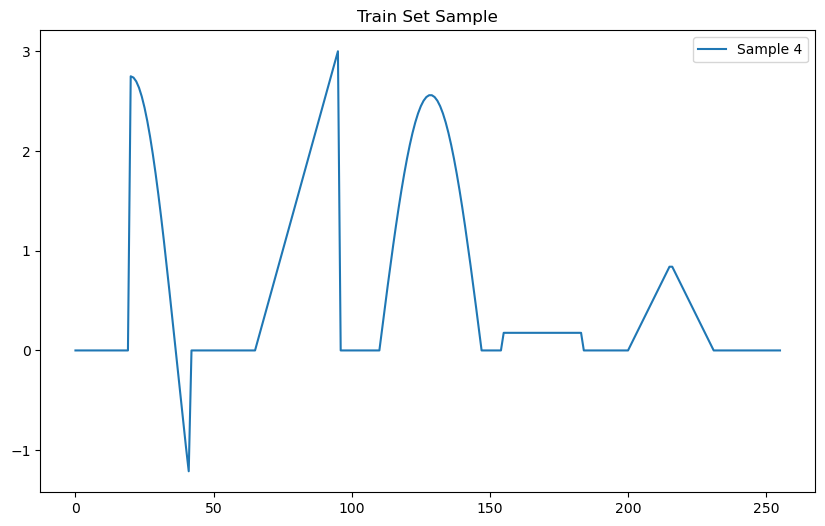

Sample Mean: 1.107232928276062, Sample Std: 1.0443310737609863


In [18]:
project_folder_path = 'C:/Users/Admin/Desktop/diffusion_ts/s'
datasets_folder_path = os.path.join(project_folder_path, 'datasets')
train_set_path = os.path.join(datasets_folder_path, 'train_set.pth')

train_set = torch.load(train_set_path)


#train_set_normalized = normalize_dataset(train_set)

test_dataset(train_set, "Train Set Sample")

#test_dataset(train_set_normalized, "Train Set Sample Normalized")
